# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [ ]:
# This dataset is contained in the sample data directory of Google Colab online runtimes
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

file_path = Path("mnist_train_small.csv")

data = np.genfromtxt(file_path, delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [2]:
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

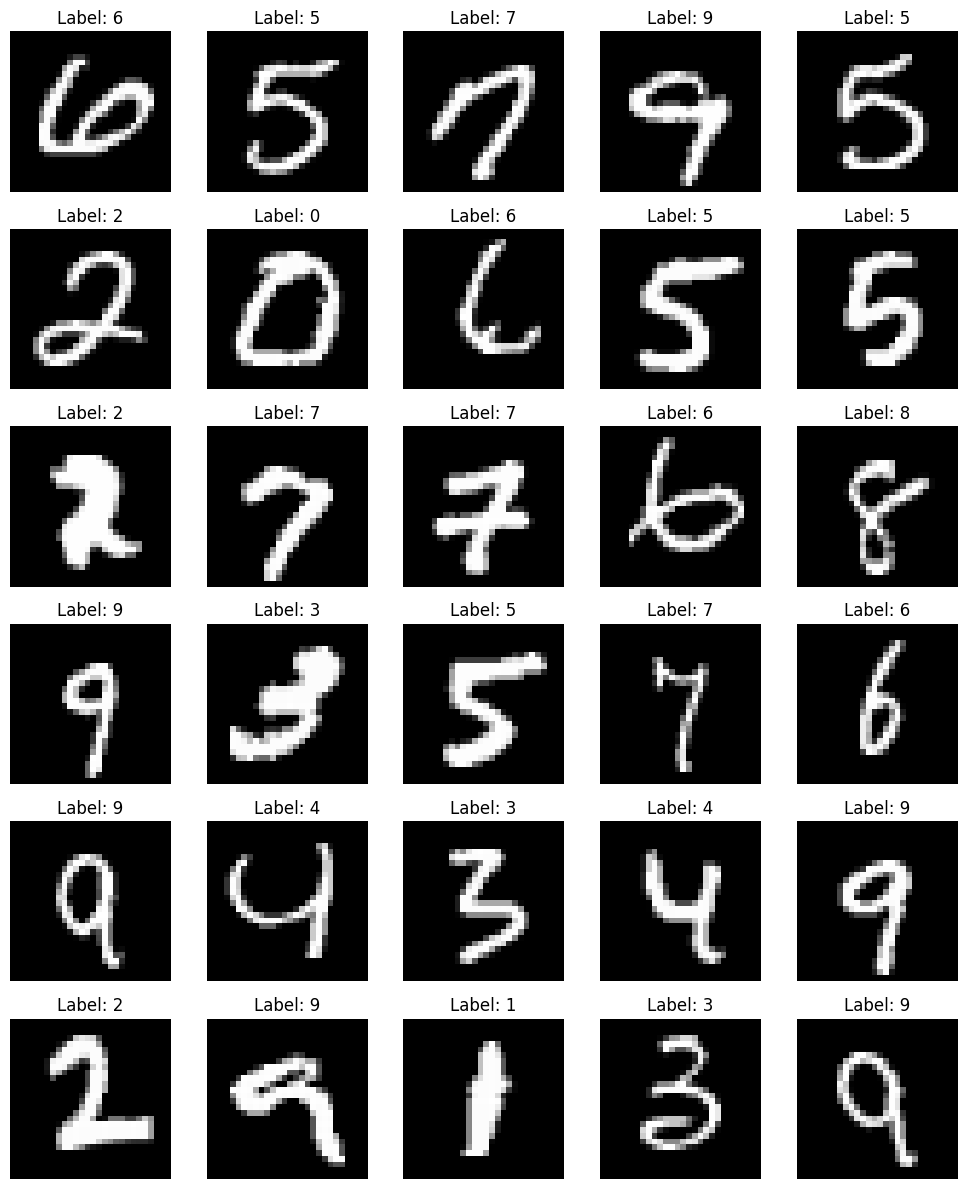

In [3]:
fig, axs = plt.subplots(6, 5, figsize=(10, 12))

for i in range(30):
    ax = axs[i // 5, i % 5]
    ax.imshow(A_full[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {int(labels_full[i])}")
    ax.axis('off')
plt.tight_layout()

Visualize the first 30 pictures corresponding the the digit "9"

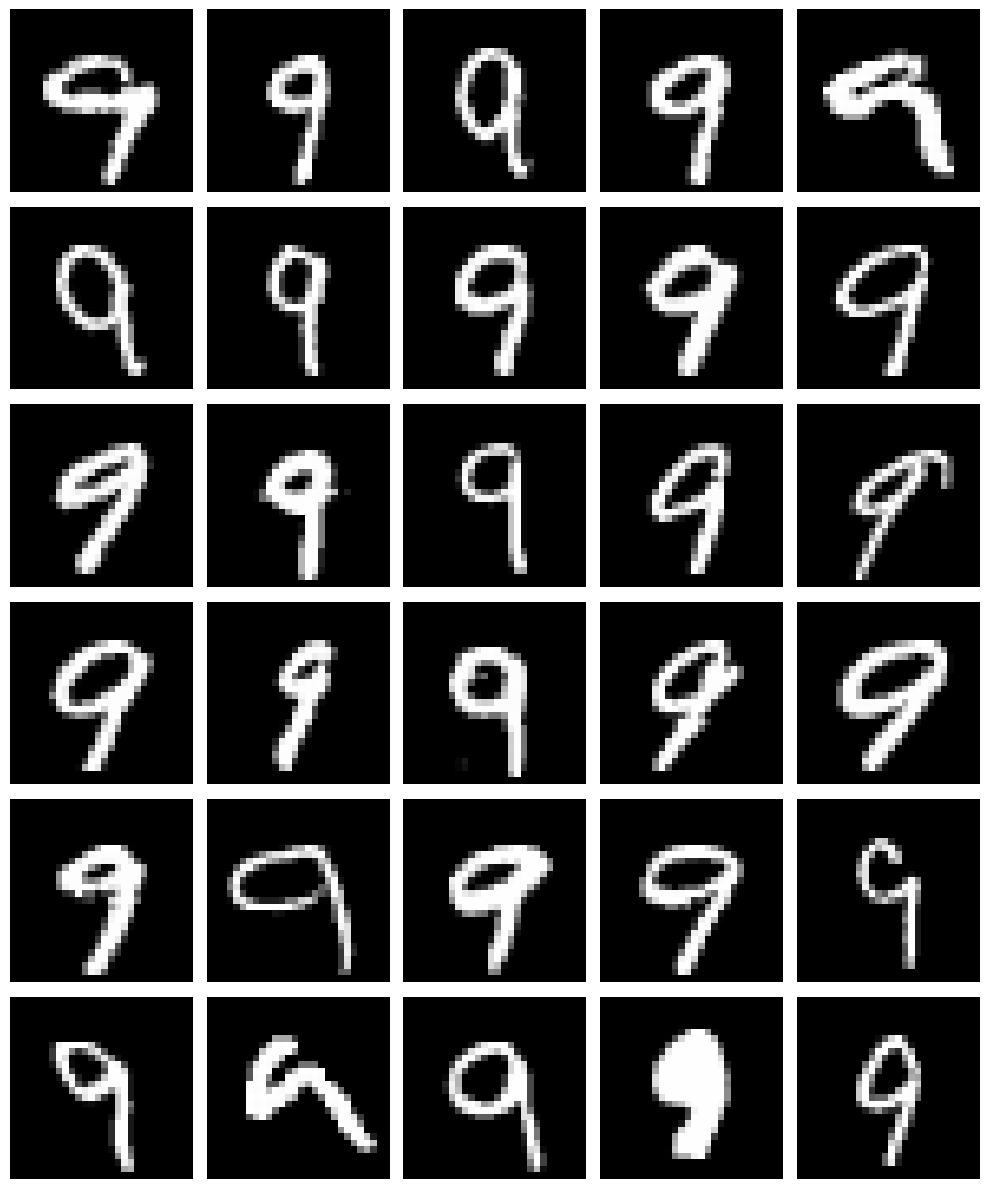

In [5]:
fig, axs = plt.subplots(6, 5, figsize=(10, 12))

nines = A_full[:, labels_full == 9]

for i in range(30):
    ax = axs[i // 5, i % 5]
    ax.imshow(nines[:, i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [13]:
mask = np.where((labels_full == 0) | (labels_full == 9))[0]
A = A_full[:, mask]
labels = labels_full[mask]

Plot the first 30 training images. 

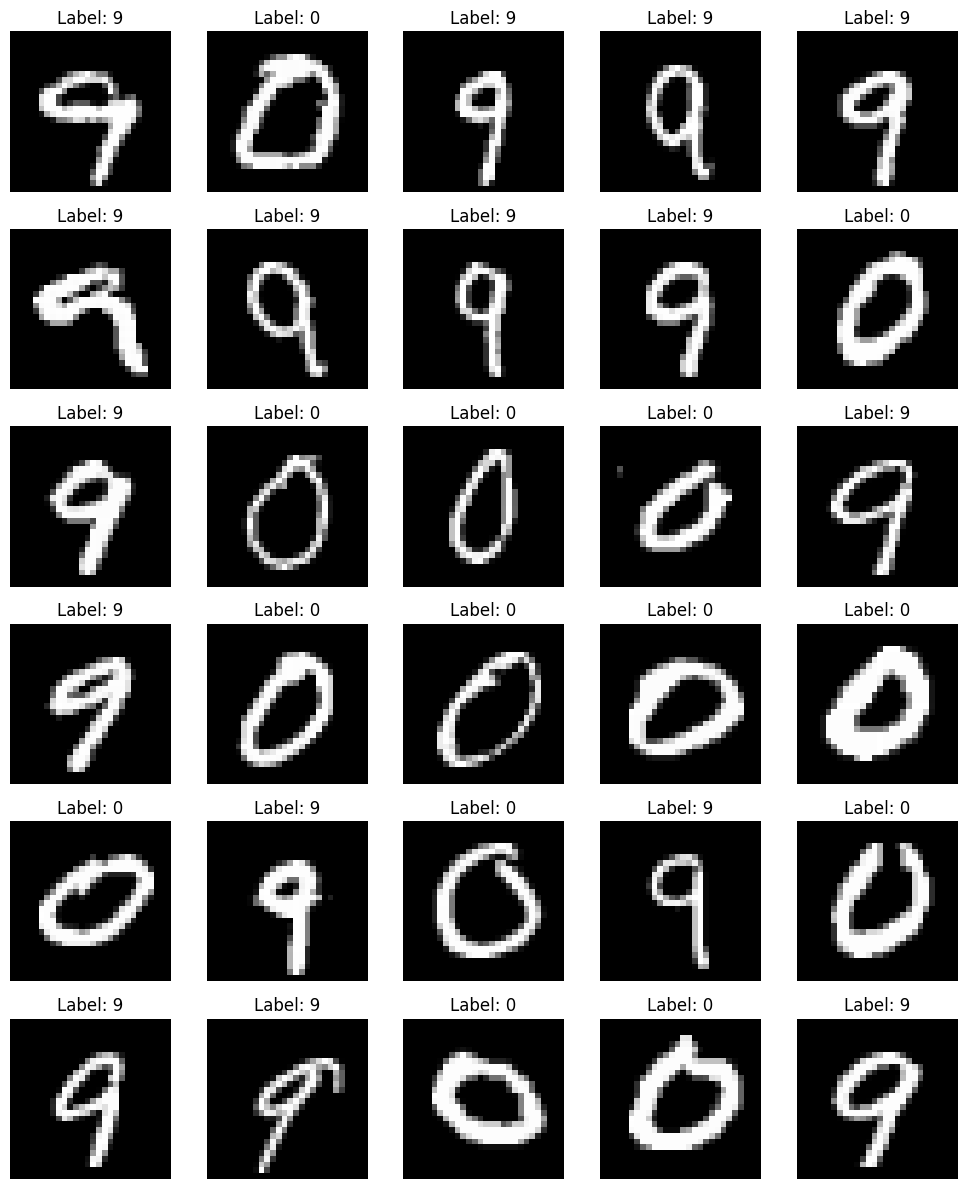

In [14]:
fig, axs = plt.subplots(6, 5, figsize=(10, 12))

for i in range(30):
    ax = axs[i // 5, i % 5]
    ax.imshow(A[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {int(labels[i])}")
    ax.axis('off')
plt.tight_layout()

Compute and visualize the average of the training data

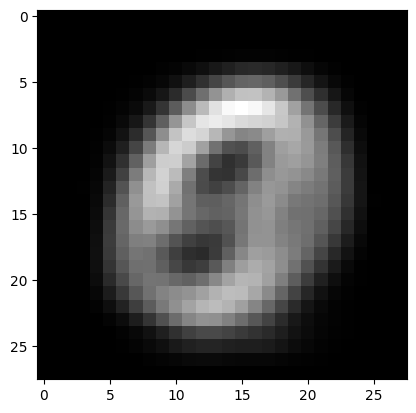

In [78]:
A_mean = A.mean(axis=1, keepdims=True)
A_centered = A - A_mean

plt.imshow(A_mean.reshape(28, 28), cmap='gray')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

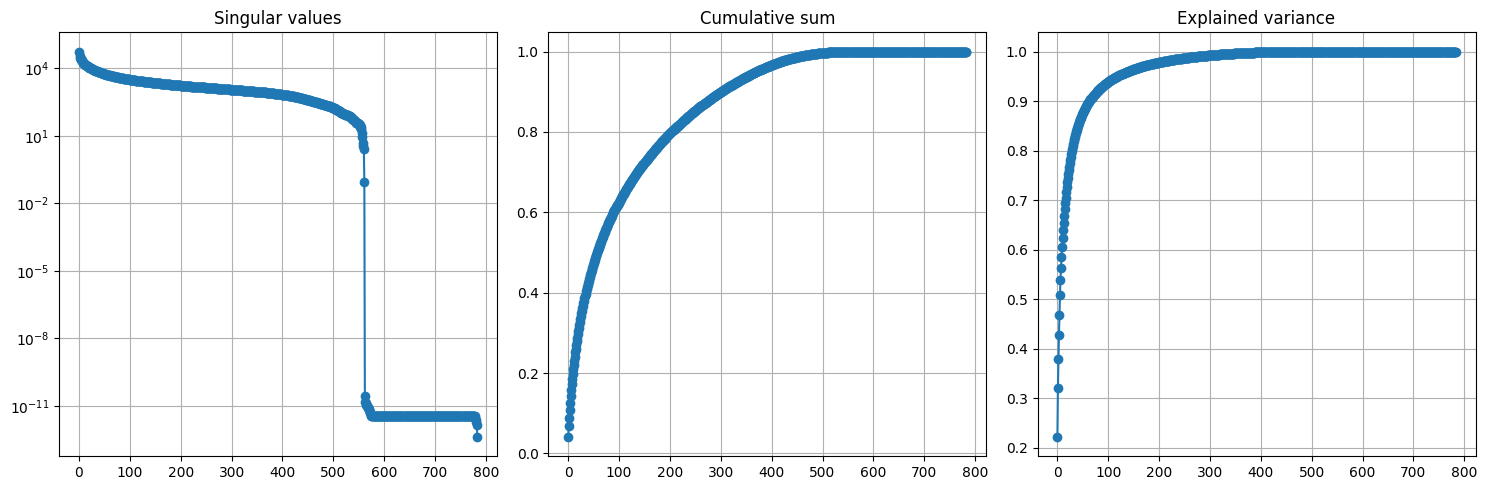

In [79]:
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].semilogy(S, marker='o')
axs[0].set_title("Singular values")
axs[0].grid()

axs[1].plot(np.cumsum(S) / np.sum(S), marker='o')
axs[1].set_title("Cumulative sum")
axs[1].grid()

axs[2].plot(np.cumsum(S**2) / np.sum(S**2), marker='o')
axs[2].set_title("Explained variance")
axs[2].grid()

plt.tight_layout()

Visualize the first 30 principal axes

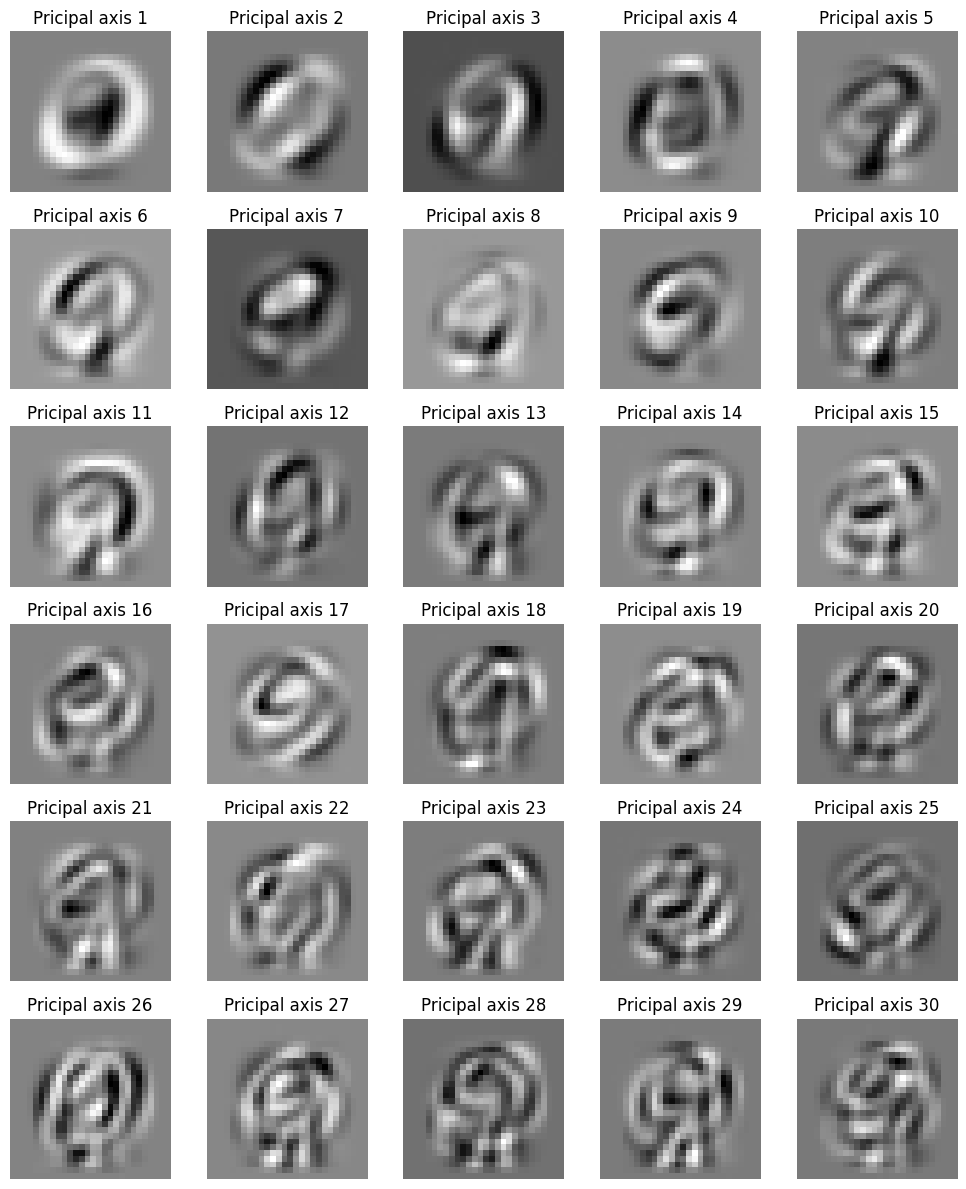

In [80]:
fig, axs = plt.subplots(6, 5, figsize=(10, 12))

for i in range(30):
    ax = axs[i // 5, i % 5]
    ax.imshow(U[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pricipal axis {i+1}")
    ax.axis('off')

plt.tight_layout()

Compute the first two principal components corresponding to the first image

In [81]:
Phi = U[:, :2].T @ A_centered[:, 0]
print(f"1st Principal component: {Phi[0]:.2f}")
print(f"2nd Principal component: {Phi[1]:.2f}")

1st Principal component: -529.10
2nd Principal component: -580.86


Define a matrix corresponding to all the principal components of all the images, and check the result of the previous point

In [82]:
Phi = U[:, :2].T @ A_centered

print(f"1st Principal component of image 0: {Phi[0,0]:.2f}")
print(f"2nd Principal component of image 0: {Phi[1,0]:.2f}")

1st Principal component of image 0: -529.10
2nd Principal component of image 0: -580.86


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

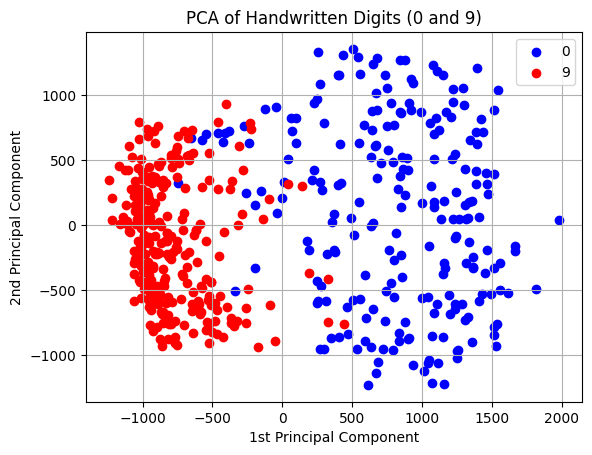

In [83]:
Phi = U[:, :2].T @ A_centered[:, :500]

x_zeros = Phi[0, labels[:500] == 0]
y_zeros = Phi[1, labels[:500] == 0]

x_nines = Phi[0, labels[:500] == 9]
y_nines = Phi[1, labels[:500] == 9]

plt.scatter(x_zeros, y_zeros, label='0', color='blue')
plt.scatter(x_nines, y_nines, label='9', color='red')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('PCA of Handwritten Digits (0 and 9)')
plt.legend()
plt.grid()

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

Confusion matrix:
True 9, Pred 9 (TP): 1974
True 0, Pred 0 (TN): 1807
True 0, Pred 9 (FP): 155
True 9, Pred 0 (FN): 49
Accuracy: 0.9488


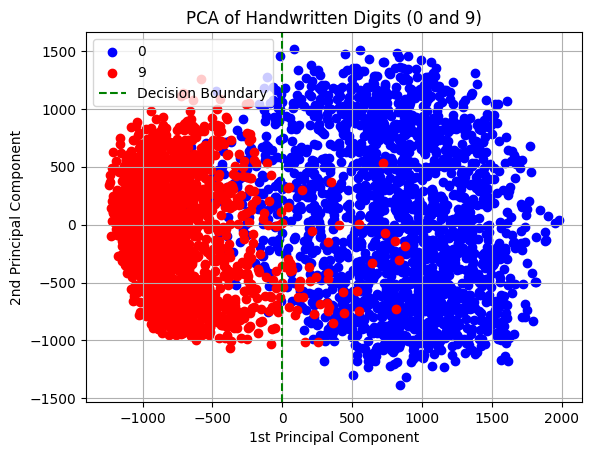

In [84]:
Phi = U[:, :2].T @ A_centered

x_zeros = Phi[0, labels == 0]
y_zeros = Phi[1, labels == 0]

x_nines = Phi[0, labels == 9]
y_nines = Phi[1, labels == 9]

# Classifier: if 1st principal component < 0, predict '9', else predict '0'
threshold = 0
predicted = np.where(Phi[0, :] < threshold, 9, 0)

plt.scatter(x_zeros, y_zeros, label='0', color='blue')
plt.scatter(x_nines, y_nines, label='9', color='red')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.axvline(x=threshold, color='green', linestyle='--', label='Decision Boundary')
plt.title('PCA of Handwritten Digits (0 and 9)')
plt.legend()
plt.grid()


# True labels
true = labels

# Confusion matrix components
tp = np.sum((predicted == 9) & (true == 9))  # True positives (correctly predicted 9)
tn = np.sum((predicted == 0) & (true == 0))  # True negatives (correctly predicted 0)
fp = np.sum((predicted == 9) & (true == 0))  # False positives (predicted 9, true 0)
fn = np.sum((predicted == 0) & (true == 9))  # False negatives (predicted 0, true 9)

# Accuracy
accuracy = (tp + tn) / len(true)

print("Confusion matrix:")
print(f"True 9, Pred 9 (TP): {tp}")
print(f"True 0, Pred 0 (TN): {tn}")
print(f"True 0, Pred 9 (FP): {fp}")
print(f"True 9, Pred 0 (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")

### Test dataset

In [85]:
data_test = np.genfromtxt("mnist_test.csv", delimiter=",")
labels_full_test = data_test[:, 0]
A_full_test = data_test[:, 1:].transpose()

In [86]:
mask = np.where((labels_full_test == 0) | (labels_full_test == 9))[0]

A_test = A_full_test[:, mask]
labels_test = labels_full_test[mask]

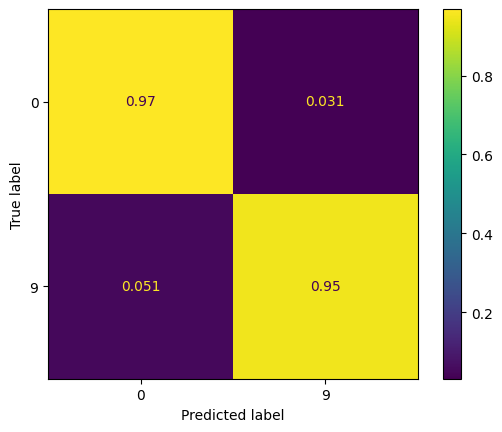

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

Phi = U[:, :2].T @ (A_test - A_mean)

predicted = np.empty(labels_test.shape, dtype=int)
predicted[Phi[0, :] <= threshold] = 9
predicted[Phi[0, :] > threshold] = 0

cm = ConfusionMatrixDisplay.from_predictions(predicted, labels_test, normalize='true')